<a href="https://colab.research.google.com/github/kanchonbishnu/Earthquake-Magnitude-Prediction/blob/main/team_members/Roshan/roshan1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd

In [ ]:
! pip install kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
files.upload() #Api key from Kaggle personal account

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"cruzifire2001","key":"7165dec62de723c4f3b7fe7492fafeaf"}'}

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!mkdir "/content/data/"

In [ ]:
%cd "/content/data/"

/content/data


In [ ]:
!kaggle datasets download -d farazrahman/earthquake #https://www.kaggle.com/datasets/farazrahman/earthquake

Dataset URL: https://www.kaggle.com/datasets/farazrahman/earthquake
License(s): CC0-1.0
  0% 0.00/467k [00:00<?, ?B/s]
100% 467k/467k [00:00<00:00, 83.4MB/s]


In [ ]:
!unzip "/content/data/earthquake.zip"

Archive:  /content/data/earthquake.zip
  inflating: all_month.csv           


In [ ]:
!rm "/content/data/earthquake.zip"

In [ ]:
df=pd.read_csv("/content/data/all_month.csv")

In [ ]:
df.head()


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2024-11-27T02:22:08.130Z,38.787167,-122.769333,2.09,0.91,md,13.0,82.0,0.015400,0.02,...,2024-11-27T02:23:43.207Z,"2 km NW of The Geysers, CA",earthquake,0.28,0.57,0.200,13.0,automatic,nc,nc
1,2024-11-27T02:16:31.660Z,38.810665,-122.777832,0.34,0.43,md,5.0,108.0,0.003417,0.01,...,2024-11-27T02:18:07.467Z,"4 km NNW of The Geysers, CA",earthquake,1.18,0.73,0.150,4.0,automatic,nc,nc
2,2024-11-27T02:03:19.844Z,61.299600,-150.726600,55.20,1.40,ml,NaN,NaN,NaN,0.25,...,2024-11-27T02:05:04.429Z,"26 km NE of Beluga, Alaska",earthquake,NaN,1.60,NaN,NaN,automatic,ak,ak
3,2024-11-27T02:01:31.640Z,19.383499,-155.244995,1.89,2.11,md,21.0,78.0,0.006288,0.20,...,2024-11-27T02:03:01.160Z,"6 km S of Volcano, Hawaii",earthquake,0.34,0.25,0.370,20.0,automatic,hv,hv
4,2024-11-27T02:00:13.420Z,33.479500,-116.510833,12.74,0.70,ml,24.0,91.0,0.077850,0.13,...,2024-11-27T02:04:32.767Z,"17 km ESE of Anza, CA",earthquake,0.24,0.45,0.112,18.0,automatic,ci,ci


In [ ]:
df.shape#before dropping Nan

(7576, 22)

In [ ]:
df.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

In [ ]:
print(df['net'])
print(df[['net','type']])

0       nc
1       nc
2       ak
3       hv
4       ci
        ..
7571    pr
7572    pr
7573    ci
7574    tx
7575    pr
Name: net, Length: 7576, dtype: object
     net        type
0     nc  earthquake
1     nc  earthquake
2     ak  earthquake
3     hv  earthquake
4     ci  earthquake
...   ..         ...
7571  pr  earthquake
7572  pr  earthquake
7573  ci  earthquake
7574  tx  earthquake
7575  pr  earthquake

[7576 rows x 2 columns]


In [ ]:
df.dropna(inplace=True)


In [ ]:
df.shape #after dropping rows with na values

(5974, 22)

In [ ]:
df['net'].unique()

array(['nc', 'hv', 'ci', 'tx', 'us', 'pr', 'mb', 'uu', 'uw', 'av', 'nm',
       'se'], dtype=object)

In [ ]:
df['type'].unique()#3 sets of data

array(['earthquake', 'quarry blast', 'explosion'], dtype=object)

In [ ]:
earthquake_df = df[df['type'] == 'earthquake']
print('Earthquakedataset'+str(earthquake_df.shape))
Quarryblast_df = df[df['type'] == 'quarry blast']
print('Quarry'+str(Quarryblast_df.shape))
Explosion_df=df[df['type']=='explosion']
print('Explosion'+str(Explosion_df.shape))

Earthquakedataset(5845, 22)
Quarry(97, 22)
Explosion(32, 22)


In [ ]:
earthquake_df.info()
print(earthquake_df.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 5845 entries, 0 to 7575
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             5845 non-null   object 
 1   latitude         5845 non-null   float64
 2   longitude        5845 non-null   float64
 3   depth            5845 non-null   float64
 4   mag              5845 non-null   float64
 5   magType          5845 non-null   object 
 6   nst              5845 non-null   float64
 7   gap              5845 non-null   float64
 8   dmin             5845 non-null   float64
 9   rms              5845 non-null   float64
 10  net              5845 non-null   object 
 11  id               5845 non-null   object 
 12  updated          5845 non-null   object 
 13  place            5845 non-null   object 
 14  type             5845 non-null   object 
 15  horizontalError  5845 non-null   float64
 16  depthError       5845 non-null   float64
 17  magError         58

In [ ]:
earthquake_df['id'].nunique()#id of row --(drop it)

5845

In [ ]:
numerical_cols = earthquake_df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numerical_cols.corr()

mag_correlations = correlation_matrix['mag'].sort_values(ascending=False)

print(mag_correlations)

mag                1.000000
rms                0.757594
horizontalError    0.729774
longitude          0.601621
nst                0.537337
dmin               0.487198
depth              0.438703
magNst             0.433458
depthError         0.342087
gap               -0.053688
magError          -0.295984
latitude          -0.719289
Name: mag, dtype: float64


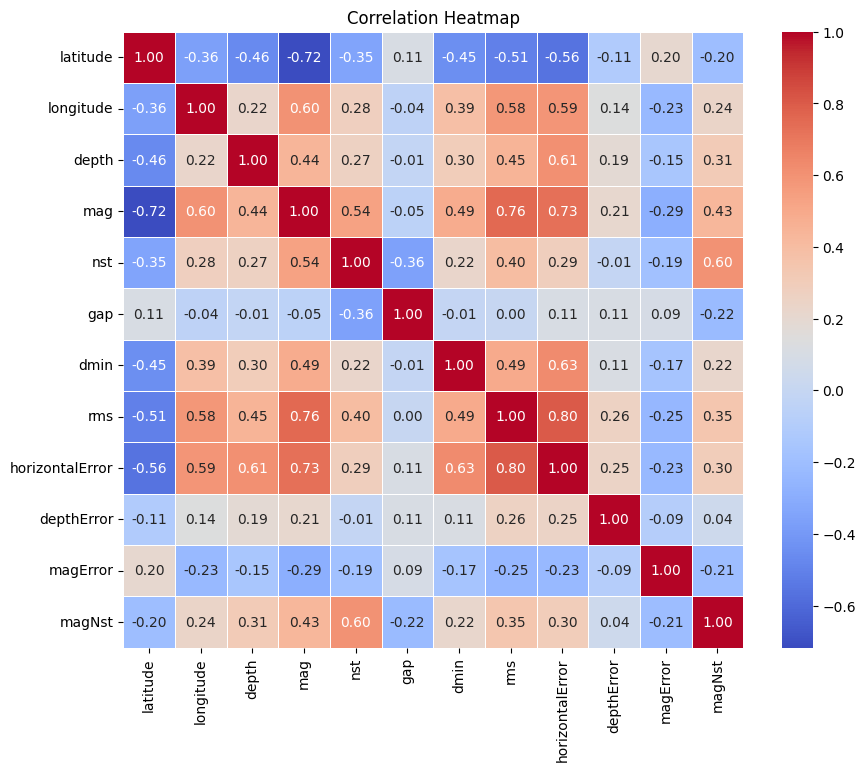

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_columns = ['latitude', 'longitude', 'depth', 'mag', 'nst', 'gap', 'dmin', 'rms',
                   'horizontalError', 'depthError', 'magError', 'magNst']

# Calculate the correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap")
plt.show()

In [ ]:
df['magType'].unique()

array(['md', 'ml', 'mb', 'mww', 'mwr', 'mb_lg'], dtype=object)

In [ ]:
df_encoded = pd.get_dummies(earthquake_df, columns=['magType'], prefix='magType')

In [ ]:
df_encoded

,time,latitude,longitude,depth,mag,nst,gap,dmin,rms,net,...,magNst,status,locationSource,magSource,magType_mb,magType_mb_lg,magType_md,magType_ml,magType_mwr,magType_mww
0,2024-11-27T02:22:08.130Z,38.787167,-122.769333,2.0900,0.91,13.0,82.0,0.015400,0.02,nc,...,13.0,automatic,nc,nc,False,False,True,False,False,False
1,2024-11-27T02:16:31.660Z,38.810665,-122.777832,0.3400,0.43,5.0,108.0,0.003417,0.01,nc,...,4.0,automatic,nc,nc,False,False,True,False,False,False
3,2024-11-27T02:01:31.640Z,19.383499,-155.244995,1.8900,2.11,21.0,78.0,0.006288,0.20,hv,...,20.0,automatic,hv,hv,False,False,True,False,False,False
4,2024-11-27T02:00:13.420Z,33.479500,-116.510833,12.7400,0.70,24.0,91.0,0.077850,0.13,ci,...,18.0,automatic,ci,ci,False,False,False,True,False,False
5,2024-11-27T01:36:15.440Z,19.380167,-155.242340,2.1700,1.84,23.0,67.0,0.006765,0.24,hv,...,12.0,automatic,hv,hv,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7571,2024-10-28T02:35:03.440Z,17.984833,-66.727500,7.2400,2.34,9.0,202.0,0.129000,0.13,pr,...,5.0,reviewed,pr,pr,False,False,True,False,False,False
7572,2024-10-28T02:33:59.190Z,17.861500,-66.903667,12.6200,2.27,7.0,250.0,0.110200,0.10,pr,...,5.0,reviewed,pr,pr,False,False,True,False,False,False
7573,2024-10-28T02:32:41.600Z,33.311667,-116.240833,4.7700,1.15,62.0,23.0,0.076620,0.20,ci,...,28.0,reviewed,ci,ci,False,False,False,True,False,False
7574,2024-10-28T02:31:43.258Z,31.668000,-104.371000,6.6125,2.10,29.0,69.0,0.100000,0.20,tx,...,22.0,reviewed,tx,tx,False,False,False,True,False,False


In [ ]:
df_encoded.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'nst', 'gap', 'dmin',
       'rms', 'net', 'id', 'updated', 'place', 'type', 'horizontalError',
       'depthError', 'magError', 'magNst', 'status', 'locationSource',
       'magSource', 'magType_mb', 'magType_mb_lg', 'magType_md', 'magType_ml',
       'magType_mwr', 'magType_mww'],
      dtype='object')

In [ ]:
y=df_encoded['mag']
X=df_encoded[['rms','horizontalError','nst','dmin','magNst','depth','latitude','longitude','magType_mb', 'magType_mb_lg', 'magType_md', 'magType_ml',
       'magType_mwr', 'magType_mww']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Will's code part for linear regression:

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.2 MB/s eta 0:00:00


In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
import numpy as np
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from catboost import CatBoostRegressor
from sklearn.neural_network import MLPRegressor




/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
# Initialize and train models with the preprocessor
models = {

    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regression": SVR(),
    "XGBoost": XGBRegressor(),
    "LightGBM": LGBMRegressor(),
    "Catboost": CatBoostRegressor(),
    "ElasticNet": ElasticNet(),
    "BayesianRidge": BayesianRidge(),
    "MLP": MLPRegressor(max_iter=500)
}

In [ ]:
results = {}

In [ ]:
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    #r2 = r2_score(y_test, y_pred)
    print(f"{model_name} - Mean Squared Error: {mse:.4f}")
    results[model_name] = mse

In [ ]:
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

In [ ]:
def evaluate_model_cv(model, X_train, y_train, model_name, cv=5):
    mse_scores = cross_val_score(model, X_train, y_train, scoring=mse_scorer, cv=cv)
    mean_mse = -np.mean(mse_scores)  # Convert back to positive MSE
    print(f"{model_name} - Mean Cross-Validated MSE: {mean_mse:.4f}")

In [ ]:
# Training and evaluating each model
for model_name, model in models.items():
    pipeline = Pipeline(steps=[('regressor', model)])
    pipeline.fit(X_train, y_train)
    evaluate_model(pipeline, X_test, y_test, model_name)


Ridge - Mean Squared Error: 0.3743
Lasso - Mean Squared Error: 1.8950
Random Forest - Mean Squared Error: 0.1061
Gradient Boosting - Mean Squared Error: 0.1396
Support Vector Regression - Mean Squared Error: 0.1747
XGBoost - Mean Squared Error: 0.1146
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000722 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1637
[LightGBM] [Info] Number of data points in the train set: 4383, number of used features: 12
[LightGBM] [Info] Start training from score 1.624335
LightGBM - Mean Squared Error: 0.1120
Learning rate set to 0.051711
0:	learn: 1.3458121	total: 49.2ms	remaining: 49.1s
1:	learn: 1.2890764	total: 51.9ms	remaining: 25.9s
2:	learn: 1.2371050	total: 54.5ms	remaining: 18.1s
3:	learn: 1.1865920	total: 57ms	remaining: 14.2s
4:	learn: 1.1389617	total: 59.6ms	remaining: 11.9s
5:	learn: 1.0950931	to

In [ ]:
results_df = pd.DataFrame(list(results.items()), columns=["Model", "Mean Squared Error"])
results_df = results_df.sort_values(by="Mean Squared Error")
print(results_df)

                        Model  Mean Squared Error
7                    Catboost            0.102875
2               Random Forest            0.106142
6                    LightGBM            0.112015
5                     XGBoost            0.114614
3           Gradient Boosting            0.139613
10                        MLP            0.158691
4   Support Vector Regression            0.174656
0                       Ridge            0.374264
9               BayesianRidge            0.374354
8                  ElasticNet            1.003208
1                       Lasso            1.895038


In [ ]:
from sklearn.ensemble import StackingRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
stacking_model = StackingRegressor(
    estimators=[
        ('catboost', CatBoostRegressor(verbose=0)),
        ('lightgbm', LGBMRegressor()),
        ('rf', RandomForestRegressor())
    ]
)

In [ ]:
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

In [ ]:
pipeline = Pipeline(steps=[('stacking', stacking_model)])
pipeline.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000277 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1637
[LightGBM] [Info] Number of data points in the train set: 4383, number of used features: 12
[LightGBM] [Info] Start training from score 1.624335
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000791 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1615
[LightGBM] [Info] Number of data points in the train set: 3506, number of used features: 12
[LightGBM] [Info] Start training from score 1.617670
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000385 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins

Pipeline(steps=[('stacking',
                 StackingRegressor(estimators=[('catboost',
                                                <catboost.core.CatBoostRegressor object at 0x790b8574f0d0>),
                                               ('lightgbm', LGBMRegressor()),
                                               ('rf',
                                                RandomForestRegressor())]))])

In [ ]:
# Perform cross-validation to get the mean MSE
mse_scores = cross_val_score(pipeline, X_train, y_train, scoring=mse_scorer, cv=5)
mean_mse = -np.mean(mse_scores)  # Convert back to positive MSE
print(f"Stacking Regressor - Mean Cross-Validated MSE: {mean_mse:.4f}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000375 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1615
[LightGBM] [Info] Number of data points in the train set: 3506, number of used features: 12
[LightGBM] [Info] Start training from score 1.617670
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000380 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1592
[LightGBM] [Info] Number of data points in the train set: 2804, number of used features: 12
[LightGBM] [Info] Start training from score 1.599119
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000206 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins

In [ ]:
# Standardize the features

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



# Build the neural network model
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))  # First hidden layer
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))                             # Second hidden layer
model.add(Dense(16, activation='relu'))                             # Third hidden layer
model.add(Dense(1, activation='linear'))                            # Output layer

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f'Test Mean Absolute Error: {mae}')